# Bike Share Case Study

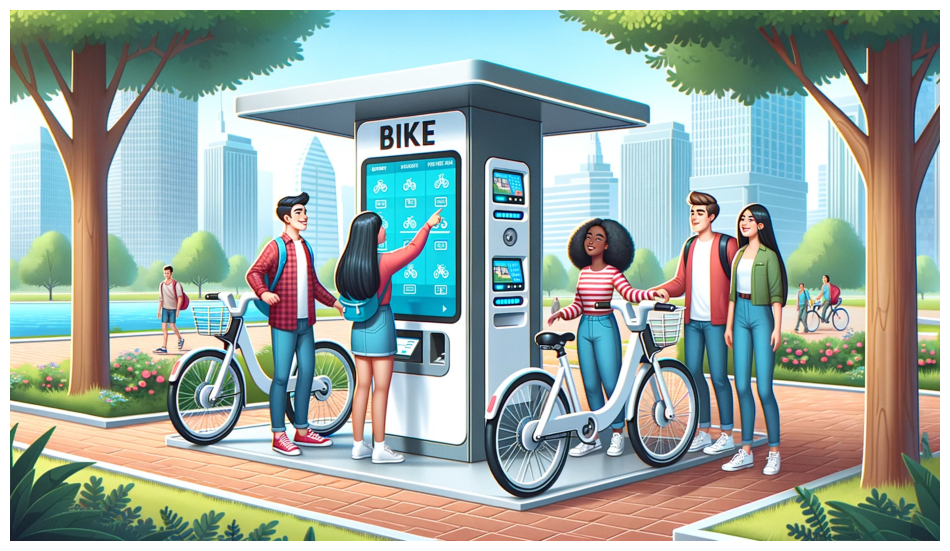

In [128]:
import requests
from PIL import Image
import matplotlib.pyplot as plt
from io import BytesIO

# URL of the image
url = 'https://github.com/rajugit1/BikeShare/blob/master/Bike.png?raw=true'  # Make sure to use the raw image URL

# Download the image
response = requests.get(url)
img = Image.open(BytesIO(response.content))

# Display the image
plt.figure(figsize=(12, 10))
plt.imshow(img)
plt.axis('off')
plt.show()


In [129]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

import warnings
warnings.filterwarnings('ignore')


# Load the data
data = pd.read_csv('day.csv')



## Set instant column as Index

In [130]:
data.set_index('instant', inplace=True)
data

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
instant,,,,,,,,,,,,,,,
1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,27-12-2019,1,1,12,0,4,1,2,10.420847,11.33210,65.2917,23.458911,247,1867,2114
727,28-12-2019,1,1,12,0,5,1,2,10.386653,12.75230,59.0000,10.416557,644,2451,3095
728,29-12-2019,1,1,12,0,6,0,2,10.386653,12.12000,75.2917,8.333661,159,1182,1341


### Data Overview

In [131]:
data_overview = {
    'head': data.head(),
    'info': data.info(),
    'shape': data.shape
}

data_overview

<class 'pandas.core.frame.DataFrame'>
Index: 730 entries, 1 to 730
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   dteday      730 non-null    object 
 1   season      730 non-null    int64  
 2   yr          730 non-null    int64  
 3   mnth        730 non-null    int64  
 4   holiday     730 non-null    int64  
 5   weekday     730 non-null    int64  
 6   workingday  730 non-null    int64  
 7   weathersit  730 non-null    int64  
 8   temp        730 non-null    float64
 9   atemp       730 non-null    float64
 10  hum         730 non-null    float64
 11  windspeed   730 non-null    float64
 12  casual      730 non-null    int64  
 13  registered  730 non-null    int64  
 14  cnt         730 non-null    int64  
dtypes: float64(4), int64(10), object(1)
memory usage: 91.2+ KB


{'head':              dteday  season  yr  mnth  holiday  weekday  workingday  \
 instant                                                               
 1        01-01-2018       1   0     1        0        6           0   
 2        02-01-2018       1   0     1        0        0           0   
 3        03-01-2018       1   0     1        0        1           1   
 4        04-01-2018       1   0     1        0        2           1   
 5        05-01-2018       1   0     1        0        3           1   
 
          weathersit       temp     atemp      hum  windspeed  casual  \
 instant                                                                
 1                 2  14.110847  18.18125  80.5833  10.749882     331   
 2                 2  14.902598  17.68695  69.6087  16.652113     131   
 3                 1   8.050924   9.47025  43.7273  16.636703     120   
 4                 1   8.200000  10.60610  59.0435  10.739832     108   
 5                 1   9.305237  11.46350  43.69

In [132]:
data.describe()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [133]:
import plotly.express as px

# Plotting the trend of bike rentals over time
fig_trend = px.line(data, x='dteday', y='cnt', title='Trend of Bike Rentals Over Time')

# Displaying the plot
fig_trend.show()

## More rentals in 2019

### Data Quality checks

In [134]:
# Check for missing values in the dataset
missing_values = data.isnull().sum()

# Check the unique values for categorical columns
unique_values = {
    "season": data["season"].unique(),
    "yr": data["yr"].unique(),
    "mnth": data["mnth"].unique(),
    "holiday": data["holiday"].unique(),
    "weekday": data["weekday"].unique(),
    "workingday": data["workingday"].unique(),
    "weathersit": data["weathersit"].unique(),
}

# check for duplicates
duplicates = data.duplicated().sum()

# check for Nan values
nan = data.isna().sum()
missing_values, unique_values , duplicates,nan



(dteday        0
 season        0
 yr            0
 mnth          0
 holiday       0
 weekday       0
 workingday    0
 weathersit    0
 temp          0
 atemp         0
 hum           0
 windspeed     0
 casual        0
 registered    0
 cnt           0
 dtype: int64,
 {'season': array([1, 2, 3, 4], dtype=int64),
  'yr': array([0, 1], dtype=int64),
  'mnth': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12], dtype=int64),
  'holiday': array([0, 1], dtype=int64),
  'weekday': array([6, 0, 1, 2, 3, 4, 5], dtype=int64),
  'workingday': array([0, 1], dtype=int64),
  'weathersit': array([2, 1, 3], dtype=int64)},
 0,
 dteday        0
 season        0
 yr            0
 mnth          0
 holiday       0
 weekday       0
 workingday    0
 weathersit    0
 temp          0
 atemp         0
 hum           0
 windspeed     0
 casual        0
 registered    0
 cnt           0
 dtype: int64)

In [135]:
# Check for missing values in the dataset
missing_values = data.isnull().sum()
missing_values

dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

## No Missing Values

In [136]:

# Check the unique values for categorical columns
unique_values = {
    "season": data["season"].unique(),
    "yr": data["yr"].unique(),
    "mnth": data["mnth"].unique(),
    "holiday": data["holiday"].unique(),
    "weekday": data["weekday"].unique(),
    "workingday": data["workingday"].unique(),
    "weathersit": data["weathersit"].unique(),
}

unique_values

{'season': array([1, 2, 3, 4], dtype=int64),
 'yr': array([0, 1], dtype=int64),
 'mnth': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12], dtype=int64),
 'holiday': array([0, 1], dtype=int64),
 'weekday': array([6, 0, 1, 2, 3, 4, 5], dtype=int64),
 'workingday': array([0, 1], dtype=int64),
 'weathersit': array([2, 1, 3], dtype=int64)}

In [137]:
data["season"].unique()

array([1, 2, 3, 4], dtype=int64)

# Categorical Variables
season: Has 4 unique values, representing the four seasons.

yr: Has 2 unique values (0 and 1), which likely correspond to two different years.

mnth: Has values from 1 to 12, representing the months.

holiday: Binary variable indicating whether the day is a holiday.

weekday: Has values from 0 to 6, representing the days of the week.

workingday: Binary variable indicating whether it's a working day.

weathersit: Has 3 unique values, representing different weather situations.

In [138]:
# check for duplicates
duplicates = data.duplicated().sum()
duplicates

0

In [139]:

# check for Nan values
nan = data.isna().sum()
nan

dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [140]:
# 2. Descriptive Statistics
descriptive_stats = data.describe(include='all')
descriptive_stats

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
unique,730,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,01-01-2018,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,NaN,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,NaN,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,NaN,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,NaN,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000


# Univariate Analysis

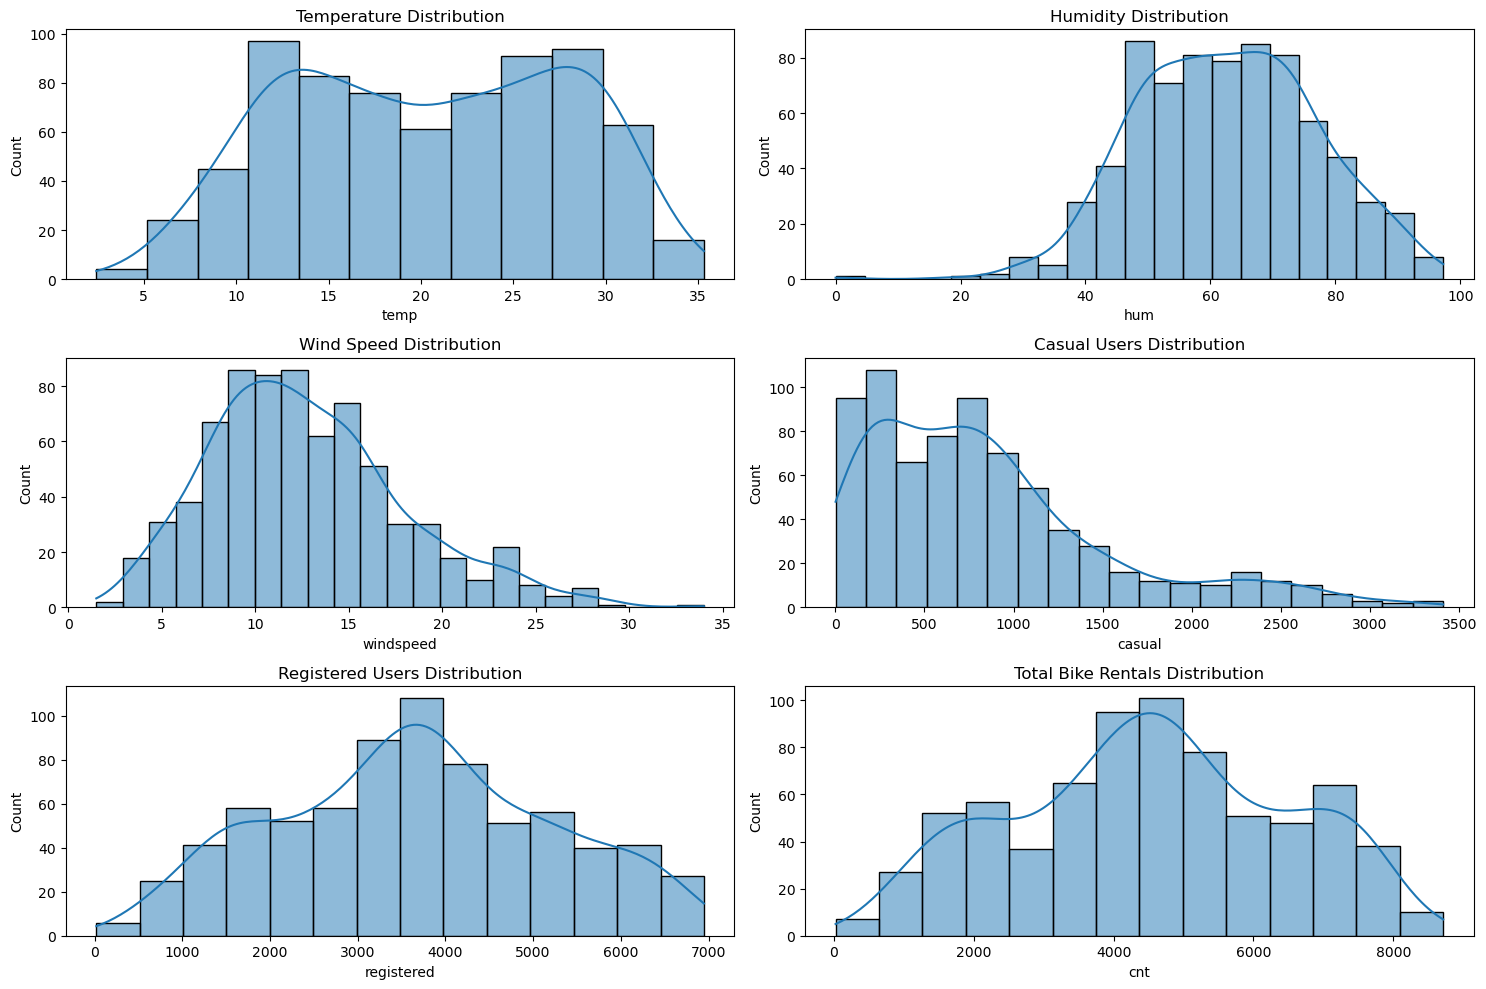

,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [141]:
#Univariate using seaborn
import seaborn as sns

# Basic statistics for numerical columns
numerical_stats = data[['temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt']].describe()

# Visualizing the distribution of some key variables
fig, ax = plt.subplots(nrows=3, ncols=2, figsize=(15, 10))

sns.histplot(data=data, x='temp', kde=True, ax=ax[0, 0])
ax[0, 0].set_title("Temperature Distribution")

sns.histplot(data=data, x='hum', kde=True, ax=ax[0, 1])
ax[0, 1].set_title("Humidity Distribution")

sns.histplot(data=data, x='windspeed', kde=True, ax=ax[1, 0])
ax[1, 0].set_title("Wind Speed Distribution")

sns.histplot(data=data, x='casual', kde=True, ax=ax[1, 1])
ax[1, 1].set_title("Casual Users Distribution")

sns.histplot(data=data, x='registered', kde=True, ax=ax[2, 0])
ax[2, 0].set_title("Registered Users Distribution")

sns.histplot(data=data, x='cnt', kde=True, ax=ax[2, 1])
ax[2, 1].set_title("Total Bike Rentals Distribution")

plt.tight_layout()
plt.show()

numerical_stats


 Temperature (temp): The distribution appears to be roughly bell-shaped, with a mean temperature of approximately 20.32°C. 
                         The temperature varies between 2.42°C and 35.33°C.
    
Humidity (hum): The distribution is slightly left-skewed, with a mean humidity of approximately 62.77%. 
                There's a noticeable spike around 100%, indicating several days with very high humidity.
        
Wind Speed (windspeed): The distribution is right-skewed, with most days having wind speeds below 20. 
                        The mean wind speed is around 12.76.
        
Casual Users (casual): The distribution is right-skewed, indicating that there are many days with fewer casual users 
                       and fewer days with a large number of casual users. 
                       The mean number of casual users is around 849.
            
Registered Users (registered): The distribution is more bell-shaped compared to casual users, 
                               with a mean of approximately 3659 registered users per day.
    
Total Bike Rentals (cnt): The distribution shows a bell-shaped curve with a mean of approximately 4508 rentals per day.

In [142]:
#Univariate using plotly
import plotly.express as px

# Univariate Analysis

# Distribution plots for continuous variables
fig_temp = px.histogram(data, x='temp', title='Distribution of Temperature')
fig_atemp = px.histogram(data, x='atemp', title='Distribution of "Feels-Like" Temperature')
fig_hum = px.histogram(data, x='hum', title='Distribution of Humidity')
fig_windspeed = px.histogram(data, x='windspeed', title='Distribution of Windspeed')
fig_cnt = px.histogram(data, x='cnt', title='Distribution of Bike Rentals (Target Variable)')

# Bar plots for categorical variables
fig_season = px.histogram(data, x='season', title='Distribution of Seasons')
fig_weathersit = px.histogram(data, x='weathersit', title='Distribution of Weather Situations')

# Displaying the plots
fig_temp.show()
fig_atemp.show()
fig_hum.show()
fig_windspeed.show()
fig_cnt.show()
fig_season.show()
fig_weathersit.show()


# Bivariate Analysis

In [143]:
import plotly.express as px

# Bivariate Analysis

# Scatter plots for continuous variables vs. the target variable (cnt)
fig_temp_vs_cnt = px.scatter(data, x='temp', y='cnt', title='Temperature vs. Bike Rentals')
fig_atemp_vs_cnt = px.scatter(data, x='atemp', y='cnt', title='"Feels-Like" Temperature vs. Bike Rentals')
fig_hum_vs_cnt = px.scatter(data, x='hum', y='cnt', title='Humidity vs. Bike Rentals')
fig_windspeed_vs_cnt = px.scatter(data, x='windspeed', y='cnt', title='Windspeed vs. Bike Rentals')

# Box plots for categorical variables vs. the target variable
fig_season_vs_cnt = px.box(data, x='season', y='cnt', title='Season vs. Bike Rentals')
fig_weathersit_vs_cnt = px.box(data, x='weathersit', y='cnt', title='Weather Situation vs. Bike Rentals')

# Displaying the plots
fig_temp_vs_cnt.show()
fig_atemp_vs_cnt.show()
fig_hum_vs_cnt.show()
fig_windspeed_vs_cnt.show()
fig_season_vs_cnt.show()
fig_weathersit_vs_cnt.show()


# Multivariate Analysis

In [144]:
import plotly.figure_factory as ff

# Multivariate Analysis
data1 = data.drop(columns=['dteday'])
# Compute the correlation matrix
corr_matrix = data1.corr()

# Create a heatmap using Plotly
fig_corr = ff.create_annotated_heatmap(
    z=corr_matrix.values,
    x=list(corr_matrix.columns),
    y=list(corr_matrix.index),
    annotation_text=corr_matrix.round(2).values,
    showscale=True
)

# Update layout for a clearer view
fig_corr.update_layout(title='Correlation Heatmap', width=800, height=800)

fig_corr.show()


In [145]:
import plotly.graph_objects as go

# Create the Plotly graph
fig = go.Figure()

# Add traces for casual and registered users
fig.add_trace(go.Scatter(x=data['dteday'], y=data['casual'], mode='lines', name='Casual Users'))
fig.add_trace(go.Scatter(x=data['dteday'], y=data['registered'], mode='lines', name='Registered Users'))

# Update layout
fig.update_layout(title='Bike Rentals Split by Casual and Registered Users',
                  xaxis_title='Date',
                  yaxis_title='Number of Users',
                  xaxis=dict(showline=True, showgrid=False, showticklabels=True),
                  yaxis=dict(zeroline=False, gridcolor='white'),
                  showlegend=True,
                  plot_bgcolor='rgba(0,0,0,0)')

fig.show()

In [146]:

# Drop 'casual', 'registered',dteday columns
data = data.drop(columns=['casual', 'registered', 'dteday'])

# Display the first few rows after transformations
data.head()


,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
instant,,,,,,,,,,,,
1,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
2,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
3,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
4,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
5,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [147]:
# One-hot encoding for categorical variables
data_encoded = pd.get_dummies(data, drop_first=True)
data_encoded

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
instant,,,,,,,,,,,,
1,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
2,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
3,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
4,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
5,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600
...,...,...,...,...,...,...,...,...,...,...,...,...
726,1,1,12,0,4,1,2,10.420847,11.33210,65.2917,23.458911,2114
727,1,1,12,0,5,1,2,10.386653,12.75230,59.0000,10.416557,3095
728,1,1,12,0,6,0,2,10.386653,12.12000,75.2917,8.333661,1341


In [148]:
data_encoded.dtypes

season          int64
yr              int64
mnth            int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
cnt             int64
dtype: object

In [149]:
import pandas as pd
import plotly.express as px
import random

# Load the dataset
data = pd.read_csv('day.csv')

# Randomly select three columns
selected_columns = random.sample(list(data.columns), 3)

# Create a 3D scatter plot
fig = px.scatter_3d(data, x=selected_columns[0], y=selected_columns[1], z=selected_columns[2])

# Update the layout and show the plot
fig.update_layout(title=f"3D Scatter plot of {selected_columns[0]}, {selected_columns[1]}, and {selected_columns[2]}")
fig.show()


In [150]:
# Example conversion based on hypothetical labels from the data dictionary
season_mapping = {1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'}
weathersit_mapping = {1: 'Clear', 2: 'Misty', 3: 'Light Snow/Rain', 4: 'Heavy Snow/Rain'}

data['season'] = data['season'].map(season_mapping)
data['weathersit'] = data['weathersit'].map(weathersit_mapping)

# Apply One-Hot Encoding
data = pd.get_dummies(data, columns=['season', 'weathersit'], drop_first=True,dtype=np.uint8)


In [151]:
continuous_cols = data.select_dtypes(include=['float64', 'int64']).columns.tolist()

In [152]:
continuous_cols

['instant',
 'yr',
 'mnth',
 'holiday',
 'weekday',
 'workingday',
 'temp',
 'atemp',
 'hum',
 'windspeed',
 'casual',
 'registered',
 'cnt']

### Dropping casual and registered as it is not required for linear regression

In [153]:
data_cleaned = data.drop(['casual', 'registered','instant'], axis=1)
data_cleaned

,dteday,yr,mnth,holiday,weekday,workingday,temp,atemp,hum,windspeed,cnt,season_Spring,season_Summer,season_Winter,weathersit_Light Snow/Rain,weathersit_Misty
0,01-01-2018,0,1,0,6,0,14.110847,18.18125,80.5833,10.749882,985,1,0,0,0,1
1,02-01-2018,0,1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,1,0,0,0,1
2,03-01-2018,0,1,0,1,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,0,0,0
3,04-01-2018,0,1,0,2,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,0,0,0
4,05-01-2018,0,1,0,3,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,27-12-2019,1,12,0,4,1,10.420847,11.33210,65.2917,23.458911,2114,1,0,0,0,1
726,28-12-2019,1,12,0,5,1,10.386653,12.75230,59.0000,10.416557,3095,1,0,0,0,1
727,29-12-2019,1,12,0,6,0,10.386653,12.12000,75.2917,8.333661,1341,1,0,0,0,1
728,30-12-2019,1,12,0,0,0,10.489153,11.58500,48.3333,23.500518,1796,1,0,0,0,0


###  Dropping atemp to solve Multicollinearity issue

In [154]:
data_cleaned = data_cleaned.drop(['atemp'], axis=1)

### Dropping dteday since we already have features like season,yr,mnth,holiday,weekday,workingday

In [155]:
data_cleaned = data_cleaned.drop(['dteday'], axis=1)

In [156]:
data_cleaned

,yr,mnth,holiday,weekday,workingday,temp,hum,windspeed,cnt,season_Spring,season_Summer,season_Winter,weathersit_Light Snow/Rain,weathersit_Misty
0,0,1,0,6,0,14.110847,80.5833,10.749882,985,1,0,0,0,1
1,0,1,0,0,0,14.902598,69.6087,16.652113,801,1,0,0,0,1
2,0,1,0,1,1,8.050924,43.7273,16.636703,1349,1,0,0,0,0
3,0,1,0,2,1,8.200000,59.0435,10.739832,1562,1,0,0,0,0
4,0,1,0,3,1,9.305237,43.6957,12.522300,1600,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,1,12,0,4,1,10.420847,65.2917,23.458911,2114,1,0,0,0,1
726,1,12,0,5,1,10.386653,59.0000,10.416557,3095,1,0,0,0,1
727,1,12,0,6,0,10.386653,75.2917,8.333661,1341,1,0,0,0,1
728,1,12,0,0,0,10.489153,48.3333,23.500518,1796,1,0,0,0,0


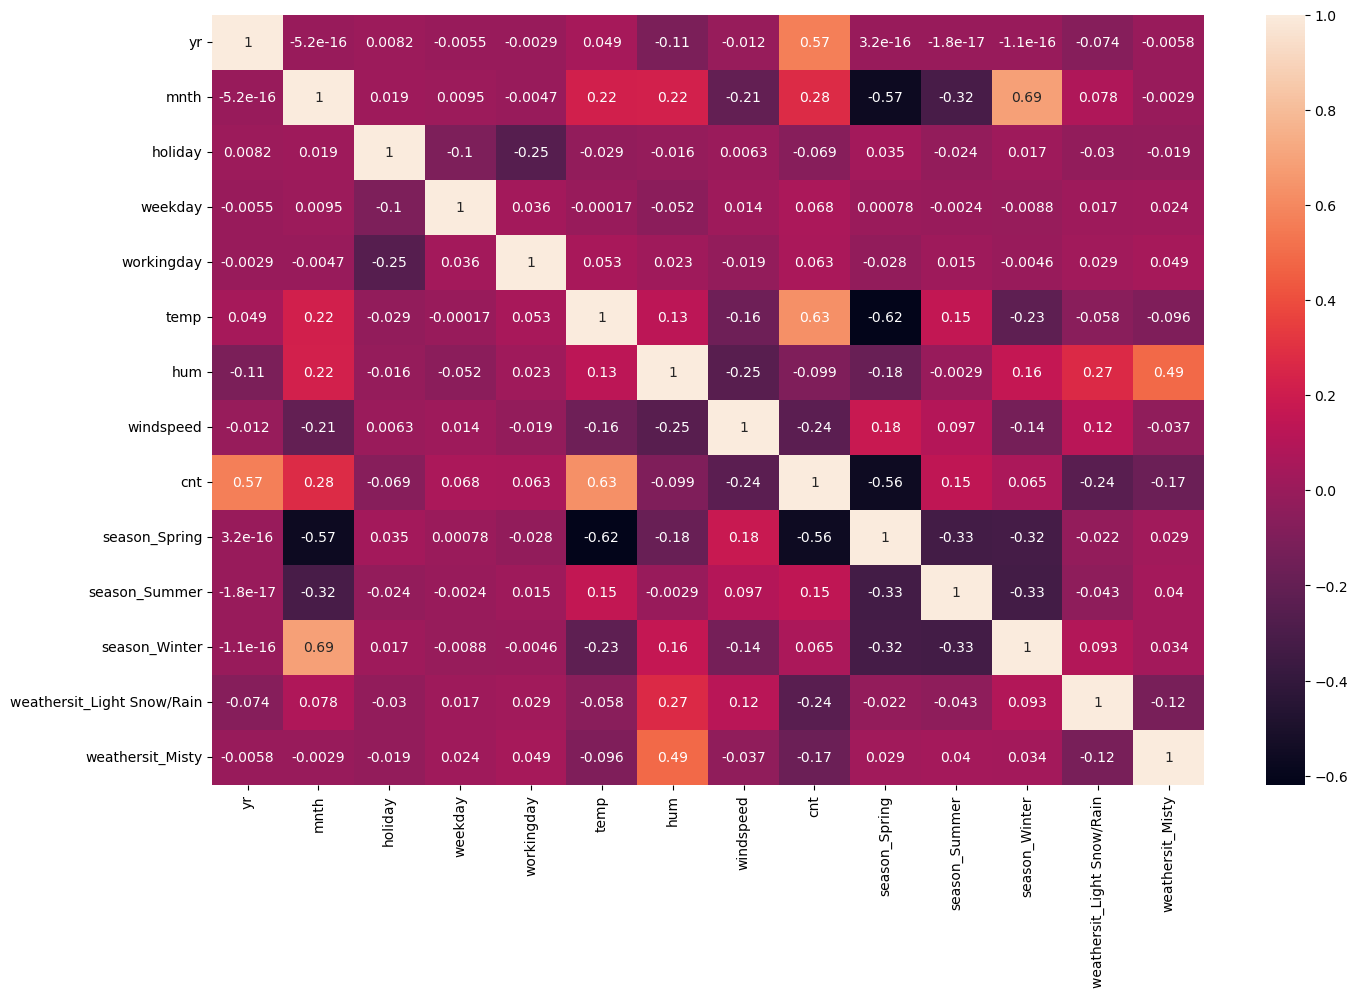

In [157]:
plt.figure(figsize=(16,10))
sns.heatmap(data_cleaned.corr(),annot=True)
plt.show()

In [158]:
data_cleaned

,yr,mnth,holiday,weekday,workingday,temp,hum,windspeed,cnt,season_Spring,season_Summer,season_Winter,weathersit_Light Snow/Rain,weathersit_Misty
0,0,1,0,6,0,14.110847,80.5833,10.749882,985,1,0,0,0,1
1,0,1,0,0,0,14.902598,69.6087,16.652113,801,1,0,0,0,1
2,0,1,0,1,1,8.050924,43.7273,16.636703,1349,1,0,0,0,0
3,0,1,0,2,1,8.200000,59.0435,10.739832,1562,1,0,0,0,0
4,0,1,0,3,1,9.305237,43.6957,12.522300,1600,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,1,12,0,4,1,10.420847,65.2917,23.458911,2114,1,0,0,0,1
726,1,12,0,5,1,10.386653,59.0000,10.416557,3095,1,0,0,0,1
727,1,12,0,6,0,10.386653,75.2917,8.333661,1341,1,0,0,0,1
728,1,12,0,0,0,10.489153,48.3333,23.500518,1796,1,0,0,0,0


In [159]:
#TRain Test Split
X=data_cleaned.drop(["cnt"],axis=1)
y=data_cleaned["cnt"]


In [160]:
X.columns

Index(['yr', 'mnth', 'holiday', 'weekday', 'workingday', 'temp', 'hum',
       'windspeed', 'season_Spring', 'season_Summer', 'season_Winter',
       'weathersit_Light Snow/Rain', 'weathersit_Misty'],
      dtype='object')

In [161]:
X.columns = X.columns.astype(str)

In [162]:
X.columns

Index(['yr', 'mnth', 'holiday', 'weekday', 'workingday', 'temp', 'hum',
       'windspeed', 'season_Spring', 'season_Summer', 'season_Winter',
       'weathersit_Light Snow/Rain', 'weathersit_Misty'],
      dtype='object')

In [163]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=100)

In [164]:
X_train.shape

(584, 13)

In [165]:
#Standardization
#z=x-xmean/sigma
X_train=(X_train-X_train.mean())/X_train.std()
X_test =(X_test-X_test.mean())/X_test.std()

In [166]:
X_train.head()

,yr,mnth,holiday,weekday,workingday,temp,hum,windspeed,season_Spring,season_Summer,season_Winter,weathersit_Light Snow/Rain,weathersit_Misty
367,0.972135,-1.596064,-0.167693,-0.464014,0.704687,-1.882464,-1.350708,2.234862,1.722701,-0.571588,-0.576856,-0.167693,-0.721070
648,0.972135,0.992308,-0.167693,0.523178,0.704687,-0.306487,-1.192918,-0.119042,-0.579490,-0.571588,1.730567,-0.167693,-0.721070
44,-1.026903,-1.308467,-0.167693,-0.957610,0.704687,-0.417082,-1.818132,2.902856,1.722701,-0.571588,-0.576856,-0.167693,-0.721070
705,0.972135,1.567501,-0.167693,1.016774,0.704687,-0.937801,0.956630,-0.771166,-0.579490,-0.571588,1.730567,-0.167693,1.384454
379,0.972135,-1.596064,-0.167693,-1.451207,-1.416639,-1.790299,-1.508497,0.771778,1.722701,-0.571588,-0.576856,-0.167693,-0.721070


In [167]:
X_test.head()

,yr,mnth,holiday,weekday,workingday,temp,hum,windspeed,season_Spring,season_Summer,season_Winter,weathersit_Light Snow/Rain,weathersit_Misty
184,-0.892733,0.169671,5.292150,-1.162642,-1.710488,1.101193,0.137062,-1.429568,-0.538549,-0.612188,-0.527995,-0.187665,1.469362
535,1.112483,-0.128786,-0.187665,-0.118053,0.580624,1.393399,-0.165012,-0.999233,-0.538549,1.622298,-0.527995,-0.187665,-0.675906
299,-0.892733,1.065041,-0.187665,0.404242,0.580624,-0.242093,1.290418,0.118115,-0.538549,-0.612188,1.880984,-0.187665,1.469362
221,-0.892733,0.468127,-0.187665,-0.118053,0.580624,1.310535,-1.271680,0.151322,-0.538549,-0.612188,-0.527995,-0.187665,-0.675906
152,-0.892733,-0.128786,-0.187665,0.404242,0.580624,1.040132,-2.057063,1.376185,-0.538549,1.622298,-0.527995,-0.187665,-0.675906


In [168]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

estimator=LinearRegression()
selector=RFE(estimator,n_features_to_select=13)

selector=selector.fit(X_train,y_train)
selector.support_

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True])

In [169]:
selected_features=X_train.columns[selector.support_]

In [170]:
X_train=X_train[selected_features]
X_test=X_test[selected_features]

In [171]:
import statsmodels.api as sm
X_train_sm=sm.add_constant(X_train)#X_train_sm["const"]=1
X_test_sm=sm.add_constant(X_test)

In [172]:
X_train_sm.head()

,const,yr,mnth,holiday,weekday,workingday,temp,hum,windspeed,season_Spring,season_Summer,season_Winter,weathersit_Light Snow/Rain,weathersit_Misty
367,1.0,0.972135,-1.596064,-0.167693,-0.464014,0.704687,-1.882464,-1.350708,2.234862,1.722701,-0.571588,-0.576856,-0.167693,-0.721070
648,1.0,0.972135,0.992308,-0.167693,0.523178,0.704687,-0.306487,-1.192918,-0.119042,-0.579490,-0.571588,1.730567,-0.167693,-0.721070
44,1.0,-1.026903,-1.308467,-0.167693,-0.957610,0.704687,-0.417082,-1.818132,2.902856,1.722701,-0.571588,-0.576856,-0.167693,-0.721070
705,1.0,0.972135,1.567501,-0.167693,1.016774,0.704687,-0.937801,0.956630,-0.771166,-0.579490,-0.571588,1.730567,-0.167693,1.384454
379,1.0,0.972135,-1.596064,-0.167693,-1.451207,-1.416639,-1.790299,-1.508497,0.771778,1.722701,-0.571588,-0.576856,-0.167693,-0.721070


In [173]:
X_test_sm.head()

,const,yr,mnth,holiday,weekday,workingday,temp,hum,windspeed,season_Spring,season_Summer,season_Winter,weathersit_Light Snow/Rain,weathersit_Misty
184,1.0,-0.892733,0.169671,5.292150,-1.162642,-1.710488,1.101193,0.137062,-1.429568,-0.538549,-0.612188,-0.527995,-0.187665,1.469362
535,1.0,1.112483,-0.128786,-0.187665,-0.118053,0.580624,1.393399,-0.165012,-0.999233,-0.538549,1.622298,-0.527995,-0.187665,-0.675906
299,1.0,-0.892733,1.065041,-0.187665,0.404242,0.580624,-0.242093,1.290418,0.118115,-0.538549,-0.612188,1.880984,-0.187665,1.469362
221,1.0,-0.892733,0.468127,-0.187665,-0.118053,0.580624,1.310535,-1.271680,0.151322,-0.538549,-0.612188,-0.527995,-0.187665,-0.675906
152,1.0,-0.892733,-0.128786,-0.187665,0.404242,0.580624,1.040132,-2.057063,1.376185,-0.538549,1.622298,-0.527995,-0.187665,-0.675906


In [174]:
model1=sm.OLS(y_train,X_train_sm)
res1=model1.fit()
res1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     229.8
Date:                Mon, 20 Nov 2023   Prob (F-statistic):          9.63e-217
Time:                        20:08:52   Log-Likelihood:                -4720.1
No. Observations:                 584   AIC:                             9468.
Df Residuals:                     570   BIC:                             9529.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                       4505.2671     32.807    137.324      0.000    4440.829    4569.705
yr                           989.1633     33.380     29.633      0.000     923.600    1054.727
mnth                         -16.2974     60.990     -0.267      0.789    -136.090     103.495
holiday                     -105.0427     34.159     -3.075      0.002    -172.136     -37.949
weekday                      159.3110     33.201      4.798      0.000      94.101     224.521
workingday                    86.3173     33.931      2.544      0.011      19.672     152.962
temp                        1001.5054     61.038     16.408      0.000     881.618    1121.392
hum                         -155.7491     45.587     -3.417      0.001    -245.288     -66.210
windspeed                   -258.3172     35.835     -7.208      0.000    -328.702    -187.932
season_Spring               -282.5058     78.427     -3.602      0.000    -436.547    -128.464
season_Summer                175.7035     51.938      3.383      0.001      73.690     277.717
season_Winter                376.1329     61.534      6.113      0.000     255.271     496.995
weathersit_Light Snow/Rain  -360.9588     36.630     -9.854      0.000    -432.904    -289.013
weathersit_Misty            -230.5889     41.529     -5.553      0.000    -312.157    -149.021
==============================================================================
Omnibus:                       90.173   Durbin-Watson:                   2.053
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              229.131
Skew:                          -0.791   Prob(JB):                     1.76e-50
Kurtosis:                       5.629   Cond. No.                         5.24
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Variance Inflation calculation

In [175]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_data=pd.DataFrame()
vif_data["Feature"]=X_train.columns

vif_data["VIF"]=[variance_inflation_factor(X_train.values,i) \
                 for i in range(len(X_train.columns))]
vif_data

,Feature,VIF
0,yr,1.033464
1,mnth,3.450078
2,holiday,1.082243
3,weekday,1.022350
4,workingday,1.067836
5,temp,3.455507
6,hum,1.927480
7,windspeed,1.191047
8,season_Spring,5.704841
9,season_Summer,2.501956


### The R-squared score on the test set is approximately 0.840, indicating that the model explains about 84% of the variance in the bike rental demand.

# R2 Calculation for test Data

In [176]:
y_pred_test = res1.predict(X_test_sm)


In [177]:
# Calculate the total sum of squares (TSS) and residual sum of squares (RSS) for the test data
TSS_test = np.sum((y_test - np.mean(y_test)) ** 2)
RSS_test = np.sum((y_test - y_pred_test) ** 2)

# Calculate R² for the test data
r_squared_test = 1 - (RSS_test / TSS_test)


In [178]:
r_squared_test 

0.7671111327752131

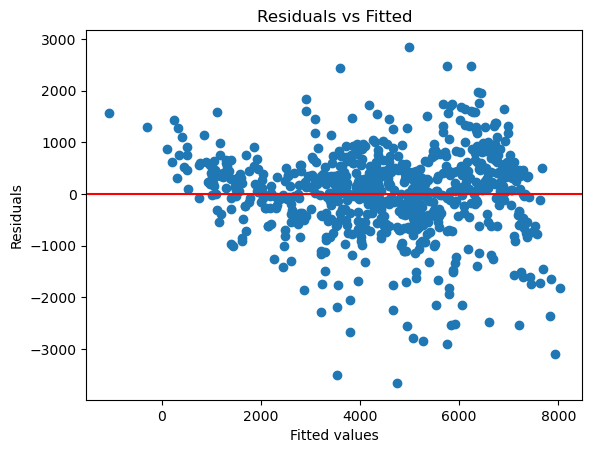

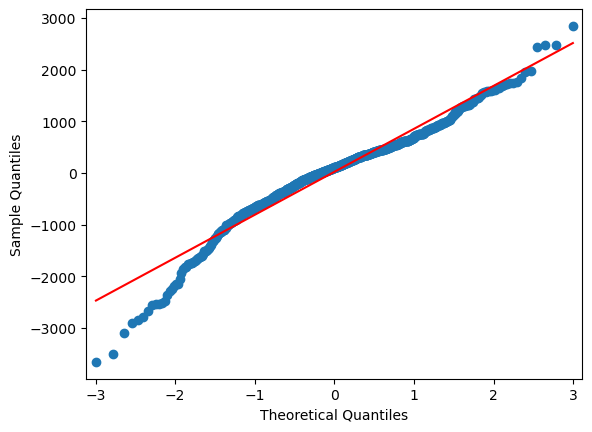

In [179]:
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Fit your model
model = sm.OLS(y, X).fit()

# Residuals
residuals = model.resid

# Residuals vs Fitted Plot
plt.scatter(model.fittedvalues, residuals)
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
plt.title('Residuals vs Fitted')
plt.axhline(y=0, color='red', linestyle='-')
plt.show()

# Q-Q plot for normality
sm.qqplot(residuals, line='s')
plt.show()

# Durbin-Watson Test
from statsmodels.stats.stattools import durbin_watson
dw = durbin_watson(residuals)


Key Observations from the Plot:
No Clear Pattern: Ideally, you want to see a random scatter of points. In this graph, there appears to be a random scatter of residuals around the horizontal line, which suggests that the model does not suffer from non-linearities or heteroscedasticity (non-constant variance).

No Funnel Shape: There's no clear "funnel" shape where the residuals get systematically larger or smaller as the fitted values increase. This suggests that the variance of the residuals is constant (homoscedasticity), which is a good sign.

Outliers: Some points lie far from the red line, especially at higher fitted values. These may be outliers or influential points that could be affecting the model more than other points. It might be worth investigating these points to see if they are accurate or if they result from data entry errors or unusual conditions.

Centered Around Zero: Most of the residuals are distributed around the zero line, which implies that there's no systematic bias in the residuals. The model doesn't consistently overpredict or underpredict across the range of fitted values.

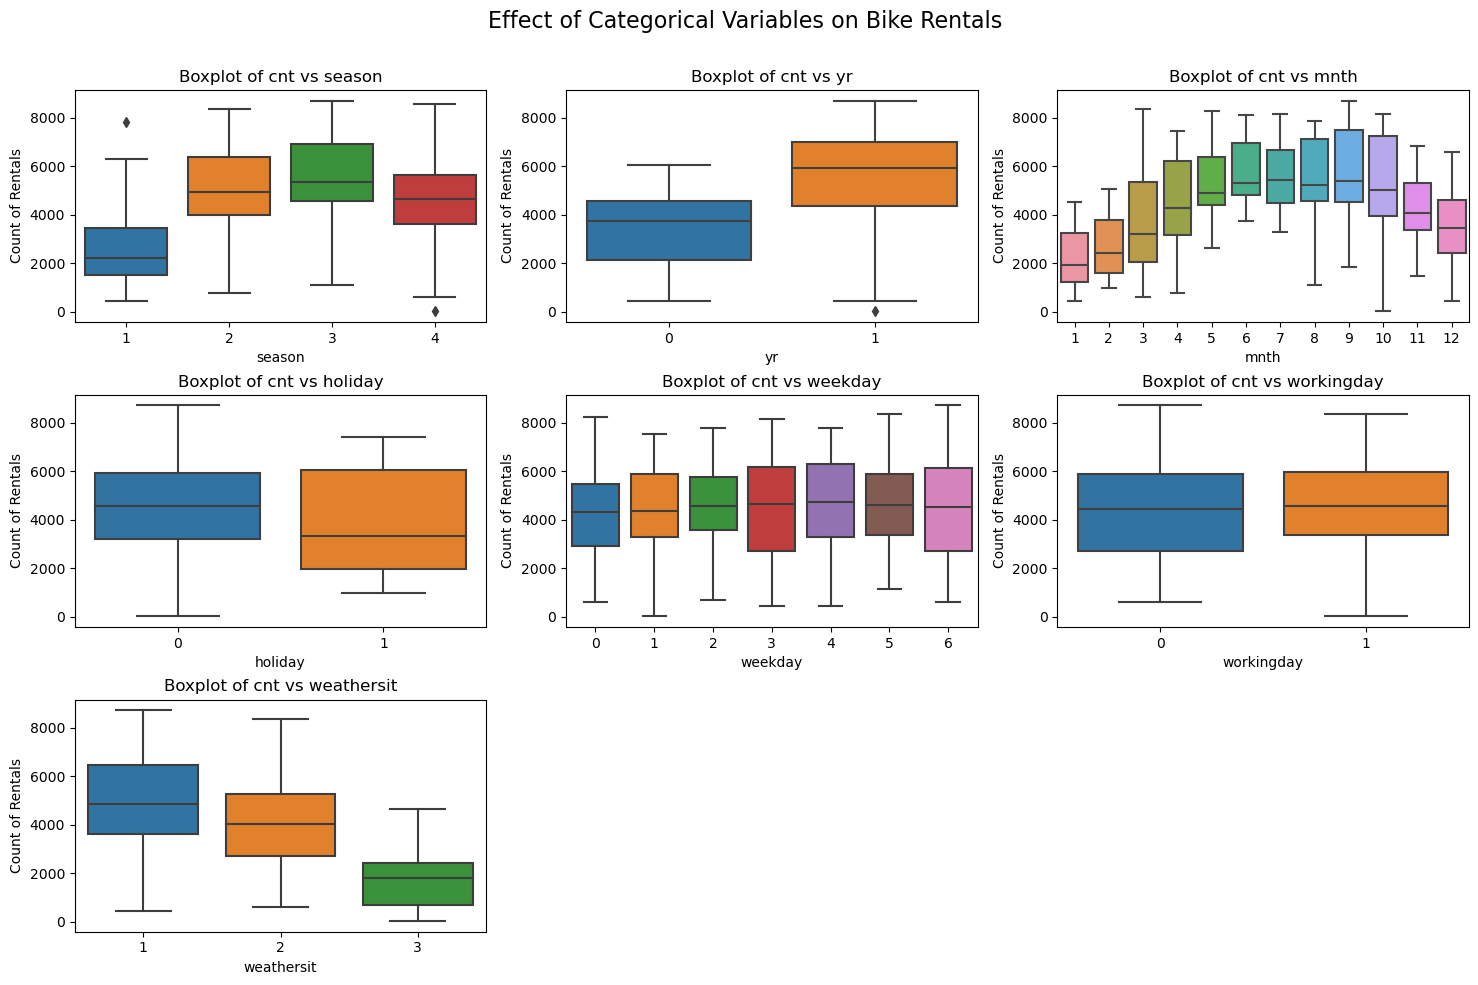

In [180]:
import matplotlib.pyplot as plt
import seaborn as sns

# List of categorical variables in the dataset
categorical_vars = ['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit']
data = pd.read_csv('day.csv')
# Create a subplot for each categorical variable
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 10))
axes = axes.flatten()  # Flatten the axes array for easy iteration

for i, var in enumerate(categorical_vars):
    sns.boxplot(x=var, y='cnt', data=data, ax=axes[i])
    axes[i].set_title(f'Boxplot of cnt vs {var}')
    axes[i].set_xlabel(var)
    axes[i].set_ylabel('Count of Rentals')

# Adjust layout and remove extra subplots if any
plt.tight_layout()
plt.subplots_adjust(top=0.9)
plt.suptitle('Effect of Categorical Variables on Bike Rentals', fontsize=16)
fig.delaxes(axes[-1])  # Remove the last empty subplot
fig.delaxes(axes[-2])  # Remove the second last empty subplot
plt.show()


Season:
There are noticeable differences in bike rental counts across seasons. It appears that some seasons (likely spring and summer) have higher median rental counts compared to others. This suggests seasonality has a significant impact on bike rentals.

Year (yr):
There seems to be a difference between the two years in terms of rental counts, with one year having a higher median count. This could indicate an overall increase in the usage of bike rentals from one year to the next.

Month (mnth):
The rental counts vary significantly across months, reflecting seasonal trends. Some months (likely warmer ones) show higher rental counts.

Holiday:
There's a difference in rental counts between holidays and non-holidays, with non-holidays having higher median rental counts. This could be due to more regular commuters or recreational users on non-holidays.

Weekday:
The impact of weekdays on rental counts seems relatively uniform, suggesting that the day of the week might not have a significant impact on overall rentals. However, some variation exists, possibly reflecting commuting patterns.

Workingday:
Working days and non-working days show some differences in rental counts. This could be related to commuting patterns, where working days might see more regular commuting usage.

Weather Situation (weathersit):
The weather situation has a clear impact on bike rentals. Better weather conditions (represented by lower category numbers) correspond to higher median rental counts. Adverse weather conditions significantly reduce bike rental usage.

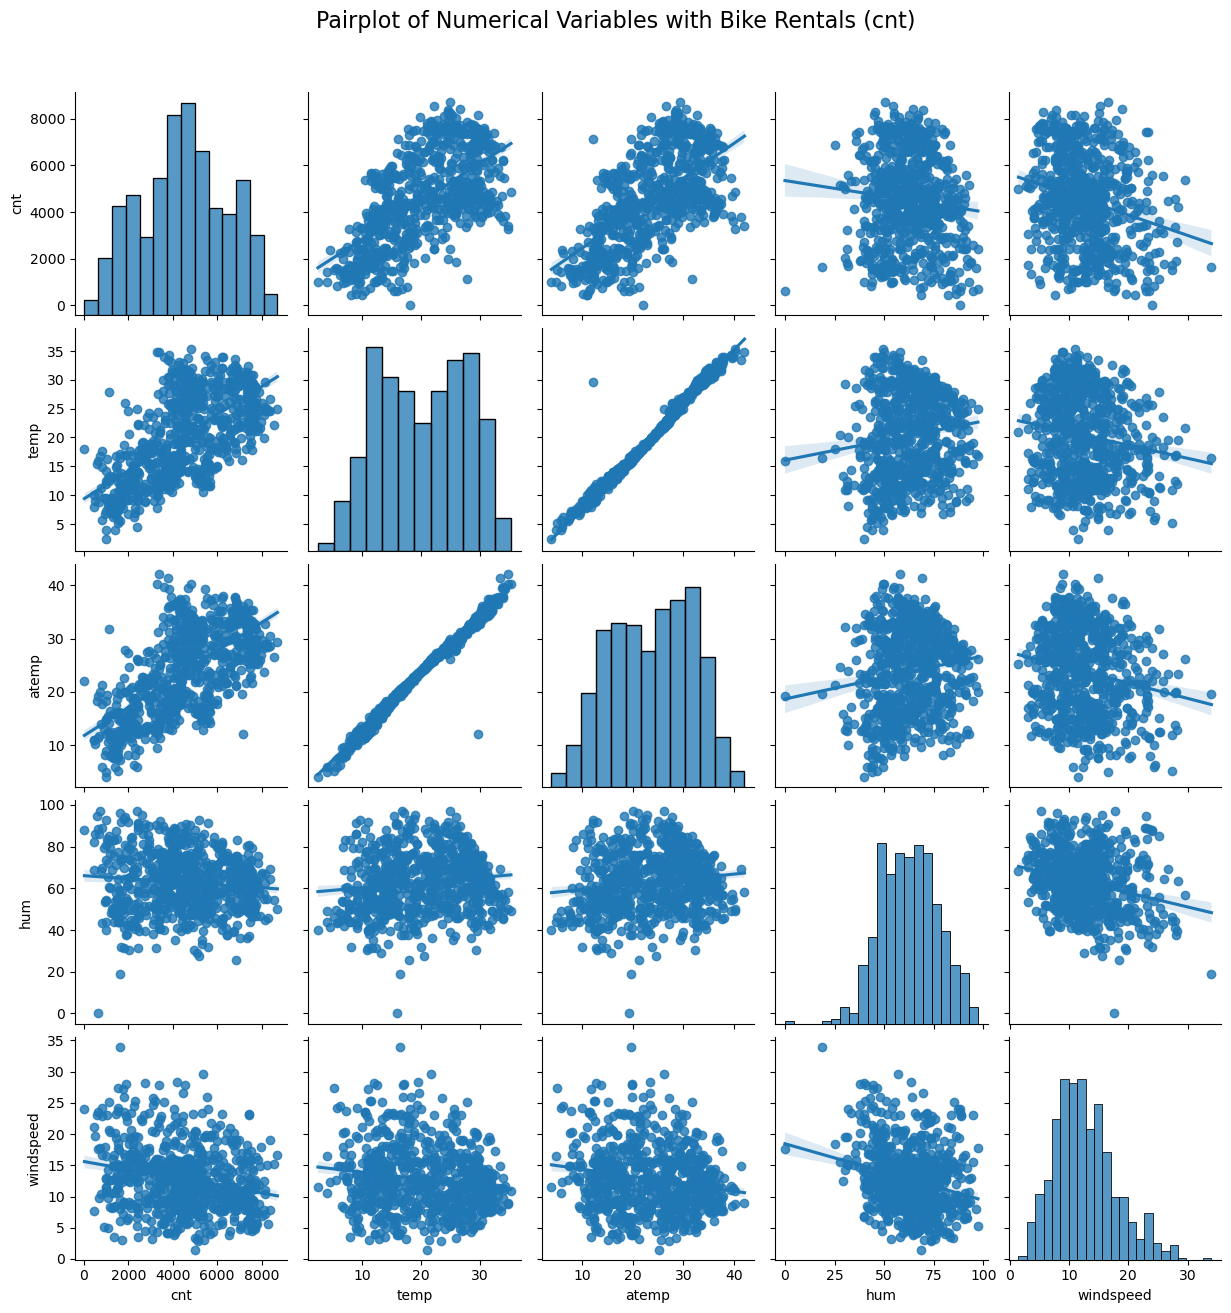

In [181]:
import seaborn as sns

# Identifying the numerical variables in the dataset
numerical_vars = ['cnt', 'temp', 'atemp', 'hum', 'windspeed']

# Pairplot for numerical variables with 'cnt' as the target variable
sns.pairplot(data, vars=numerical_vars, y_vars=['cnt'], kind='reg')
plt.suptitle('Pairplot of Numerical Variables with Bike Rentals (cnt)', fontsize=16, y=1.05)
plt.show()


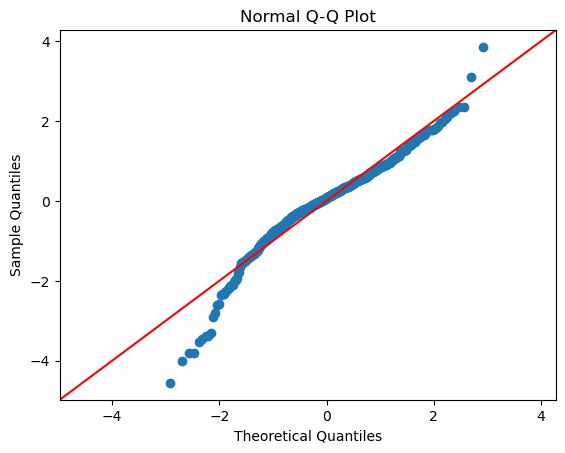

Shapiro-Wilk test:
Statistic: 0.951607882976532, p-value: 6.600405985657254e-13


In [182]:
import statsmodels.api as sm
from scipy import stats
import matplotlib.pyplot as plt

# Assuming 'residuals' is a Pandas Series or a NumPy array containing the residuals of your model
# which you get after fitting your model with the training data
model = sm.OLS(y_train, X_train)
results = model.fit()
predictions = results.predict(X_train)
residuals = y_train - predictions
# Q-Q plot for normality
sm.qqplot(residuals, line='45', fit=True)
plt.title('Normal Q-Q Plot')
plt.show()

# Shapiro-Wilk test for normality
shapiro_test = stats.shapiro(residuals)
print(f"Shapiro-Wilk test:\nStatistic: {shapiro_test.statistic}, p-value: {shapiro_test.pvalue}")


In [183]:
from sklearn.linear_model import LinearRegression

# Create the linear regression object
lm = LinearRegression()

# Fit the model
lm.fit(X_train, y_train)

# The coefficients
print('Intercept:', lm.intercept_)
print('Coefficients:', lm.coef_)


Intercept: 4505.267123287672
Coefficients: [ 989.16333236  -16.29741643 -105.04267742  159.31100869   86.31727796
 1001.50540449 -155.74909916 -258.31721673 -282.50581084  175.70346438
  376.13292269 -360.95878486 -230.58890822]


In [184]:
X_train.columns

Index(['yr', 'mnth', 'holiday', 'weekday', 'workingday', 'temp', 'hum',
       'windspeed', 'season_Spring', 'season_Summer', 'season_Winter',
       'weathersit_Light Snow/Rain', 'weathersit_Misty'],
      dtype='object')